In [ ]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
matplotlib.rcParams['figure.figsize'] = (20, 10)

In [ ]:
og_data = pd.read_csv('bengaluru_house_prices.csv')
og_data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [ ]:
og_data.isnull().sum()

,0
area_type,0
availability,0
location,1
size,16
society,5502
total_sqft,0
bath,73
balcony,609
price,0


* df1 without extra columns and null values




In [ ]:
df1 = og_data.drop(['area_type','availability','society','balcony'], axis='columns')
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13319 non-null  object 
 1   size        13304 non-null  object 
 2   total_sqft  13320 non-null  object 
 3   bath        13247 non-null  float64
 4   price       13320 non-null  float64
dtypes: float64(2), object(3)
memory usage: 520.4+ KB


In [ ]:
df1.isnull().sum()

,0
location,1
size,16
total_sqft,0
bath,73
price,0


* df2 = cleaning dataset, removing irregularities

In [ ]:
df2 = df1.dropna()
df2.shape

(13246, 5)

In [ ]:
df2['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [ ]:
df2['bhk'] = df2['size'].apply(lambda x: int(x.split(' ')[0]))
df2.drop('size', axis=1, inplace=True)

/tmp/ipython-input-4042629663.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['bhk'] = df2['size'].apply(lambda x: int(x.split(' ')[0]))
/tmp/ipython-input-4042629663.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.drop('size', axis=1, inplace=True)


In [ ]:
df2['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [ ]:
import re

def convert_sqft_to_num(x):
  tokens = x.split('-')
  if(len(tokens) == 2):
    return (float(tokens[0])+float(tokens[1]))/2

  try:
    return float(x)
  except:
    numbers = re.findall(r'\d+', x)
    units = re.findall(r'[a-zA-Z]+', x)

    value_str = numbers[0]
    unit = units[0].lower()


    try:
        value = float(value_str)
    except ValueError:
        return f"Invalid number: {value_str}"

    # Define conversion factors
    sq_meter_to_sq_feet = 10.7639
    perch_to_sq_feet = 272.25

    if "meter" in unit or "squaremeter" in unit or "sq" in unit:
        result = value * sq_meter_to_sq_feet
        return float(result)
    elif "perch" in unit:
        result = value * perch_to_sq_feet
        return float(result)
    elif "acre" in unit:
        result = value * 43560
        return float(result)
    elif "guntha" in unit:
        result = value * 1089
        return float(result)
    elif "cents" in unit:
        result = value * 435.56
        return float(result)
    elif "grounds" in unit:
        result = value * 2400.35
        return float(result)
    else:
        return f"Unknown unit: {units[0]}"
    return "NA"

In [ ]:
df2['total_sqft'] = df2['total_sqft'].apply(convert_sqft_to_num)

/tmp/ipython-input-3766067606.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['total_sqft'] = df2['total_sqft'].apply(convert_sqft_to_num)


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13246 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13246 non-null  object 
 1   total_sqft  13246 non-null  float64
 2   bath        13246 non-null  float64
 3   price       13246 non-null  float64
 4   bhk         13246 non-null  int64  
dtypes: float64(3), int64(1), object(1)
memory usage: 620.9+ KB


In [ ]:
type_counts = df2['total_sqft'].apply(lambda x: type(x)).value_counts()
type_counts

,count
total_sqft,
<class 'float'>,13246


In [ ]:
# 1. Create a boolean mask: True for strings, False for others
is_string_mask = df2['total_sqft'].apply(lambda x: isinstance(x, str))

# 2. Use the mask to select only the rows where the mask is True
string_objects = df2.loc[is_string_mask, 'total_sqft']

# Print the resulting Pandas Series
print("--- Result as a Pandas Series ---")
print(string_objects)

--- Result as a Pandas Series ---
Series([], Name: total_sqft, dtype: float64)


In [ ]:
df2.loc[30]

,30
location,Yelahanka
total_sqft,2475.0
bath,4.0
price,186.0
bhk,4


* df3 adding some more columns and reducing locations

In [ ]:
df3 = df2.copy()

In [ ]:
df3['price_per_sqft'] = (df3['price']*100000)/(df3['total_sqft'])
df3.head()

,location,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000


In [ ]:
location_stats = df3.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

,location
location,
Whitefield,534
Sarjapur Road,392
Electronic City,302
Kanakpura Road,266
Thanisandra,233
...,...
bsk 6th stage 2ad block near sri conversation hall,1
"beml layout, basaveshwara nagar",1
basaveshwarnagar,1


In [ ]:
len(df3['location'].unique())

1304

In [ ]:
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

,location
location,
Nagadevanahalli,10
Naganathapura,10
BTM 1st Stage,10
Nagappa Reddy Layout,10
Basapura,10
...,...
bsk 6th stage 2ad block near sri conversation hall,1
"beml layout, basaveshwara nagar",1
basaveshwarnagar,1


In [ ]:
df3['location'] = df3['location'].apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
df3.head()

,location,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000


In [ ]:
len(df3['location'].unique())

242

## Removing Outliers

### sqft/bhk outliers


In [ ]:
df4 = df3.copy()

In [ ]:
df4 = df4[~(df4.total_sqft/df4.bhk <300)]

### Removing extreme price per sqft outliers

In [ ]:
def price_per_sqft_outlier_remover(df):
  df_out = pd.DataFrame()
  for key, subdf in df.groupby('location'):
    m = np.mean(subdf.price_per_sqft)
    st = np.std(subdf.price_per_sqft)
    reduced_Df = subdf[(subdf.price_per_sqft>m-st) & (subdf.price_per_sqft<m+st)]
    df_out = pd.concat([df_out, reduced_Df], ignore_index=True)
  return df_out


df4 = price_per_sqft_outlier_remover(df4)

### Removing same location, same ppsqft aprtments having more price of n-1 bhk than n bhk

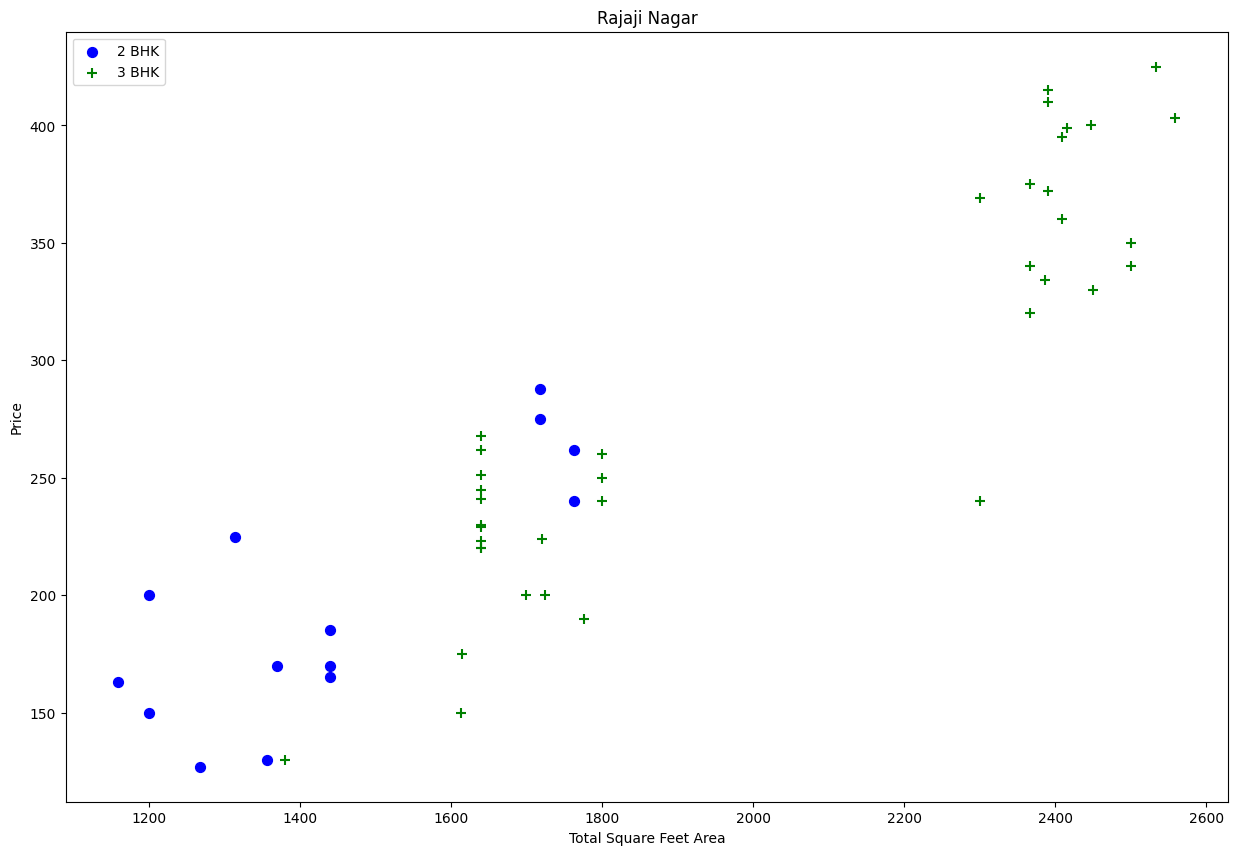

In [ ]:
def plot_scatter_chart(df, location):

  bhk2 = df[(df.location == location) & (df.bhk == 2)]
  bhk3 = df[(df.location == location) & (df.bhk == 3)]


  matplotlib.rcParams['figure.figsize'] = (15, 10)
  plt.scatter(bhk2.total_sqft, bhk2.price, color='blue',label='2 BHK', s=50)
  # plt.scatter(bhk3.total_sqft, bhk3.price, marker='+', color='green',label='3BHK', s=50)
  plt.scatter(bhk3.total_sqft, bhk3.price, marker='+', color='green', label='3 BHK', s=50)
  plt.xlabel('Total Square Feet Area')
  plt.ylabel('Price')
  plt.title(location)
  plt.legend()
  plt.show()

plot_scatter_chart(df4, "Rajaji Nagar")

* Building dixtionary to avoid such kind of anomalies/outliers

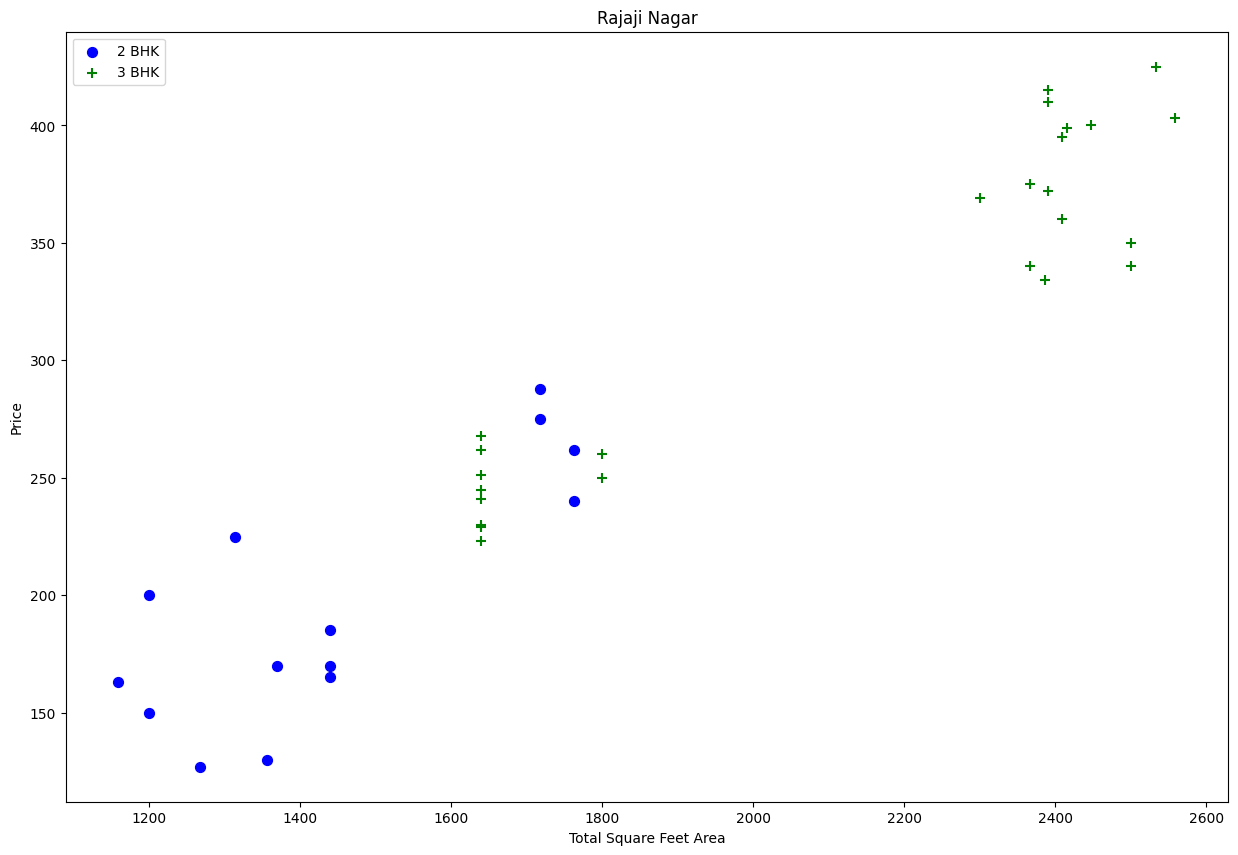

In [ ]:
def remove_bhk_outliers(df):
  exclude_indices = np.array([])
  for location, location_df in df.groupby('location'):
    bhk_stats={}
    for bhk, bhk_df in location_df.groupby('bhk'):
      bhk_stats[bhk]={
          'mean': np.mean(bhk_df.price_per_sqft),
          'std': np.std(bhk_df.price_per_sqft),
          'count': bhk_df.shape[0]
      }

    for bhk, bhk_df in location_df.groupby('bhk'):
      stats = bhk_stats.get(bhk-1)
      if stats and stats['count']>5:
        exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<stats['mean']].index.values)

  return df.drop(exclude_indices, axis='index')


df4 = remove_bhk_outliers(df4)
plot_scatter_chart(df4, "Rajaji Nagar")

### Plot histogram : how many apartments in a per sqft

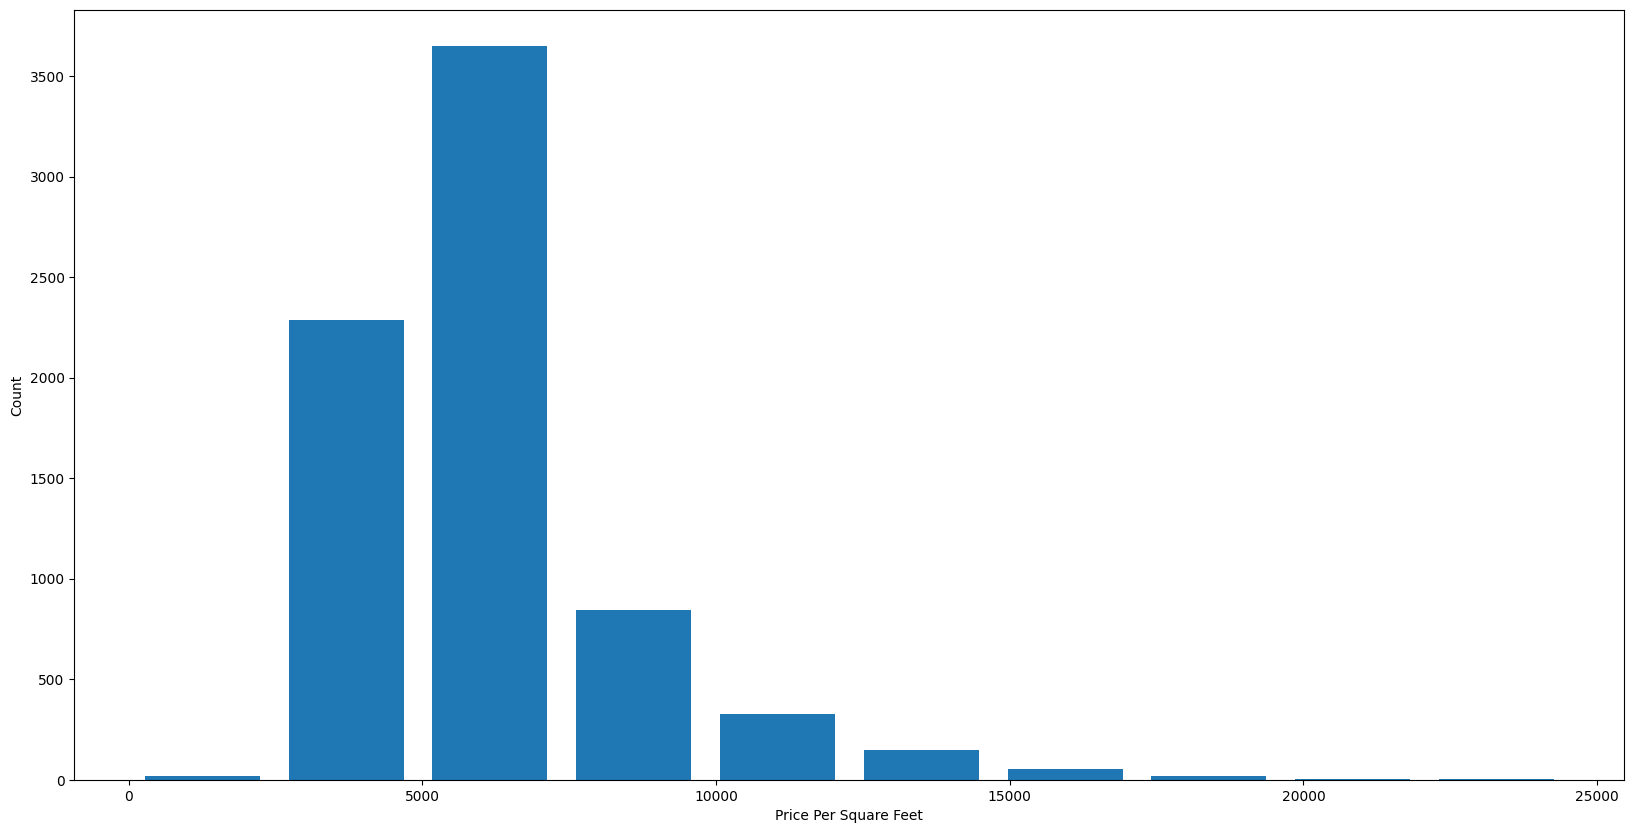

In [ ]:
matplotlib.rcParams['figure.figsize'] = (20, 10)
plt.hist(df4.price_per_sqft, rwidth=0.8)
plt.xlabel('Price Per Square Feet')
plt.ylabel('Count')
plt.show()

In [ ]:
df4 = df4[df4.bath<df4.bhk+2]
df4.shape

(7281, 6)

# Model Building

In [ ]:
df5 = df4.copy()
dummies = pd.get_dummies(df5.location)
df5 = pd.concat([df5,dummies.drop('other',axis='columns')],axis='columns')
df5 = df5.drop('location',axis='columns')

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = df5.drop(['price','price_per_sqft'], axis=1)
y = df5.price

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)

lr = LinearRegression()
lr.fit(X_train, y_train)
print(X.head())
lr.score(X_test, y_test)

   total_sqft  bath  bhk   Devarachikkanahalli  1st Block Jayanagar  \
1      1250.0   2.0    2                  True                False   
2      1200.0   2.0    2                  True                False   
3      1170.0   2.0    2                  True                False   
4      1425.0   2.0    3                  True                False   
5       947.0   2.0    2                  True                False   

   1st Phase JP Nagar  2nd Phase Judicial Layout  2nd Stage Nagarbhavi  \
1               False                      False                 False   
2               False                      False                 False   
3               False                      False                 False   
4               False                      False                 False   
5               False                      False                 False   

   5th Block Hbr Layout  5th Phase JP Nagar  ...  Vijayanagar  \
1                 False               False  ...        False  

0.6304680723878919

In [ ]:
# Using CV:
from sklearn.model_selection import cross_val_score, ShuffleSplit
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=32)
cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.63046807, 0.51314042, 0.49422258, 0.47565551, 0.55644047])

In [ ]:
# Using GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X, y):
  algos = {

      'linear_regression': {
          'model':LinearRegression(),
          'params' : {
              'positive':[True, False]
          }
      },

      'lasso': {
          'model': Lasso(),
          'params': {
              'alpha': [1,2],
              'selection': ['random','cyclic']
          }
      },

      'decision_tree': {
          'model': DecisionTreeRegressor(),
          'params': {
              'criterion':['squared_error','friedman_mse'],
              'splitter':['best','random']
          }
      }
  }

  scores = []
  cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=32)

  for algo_name, config in algos.items():
    gs = GridSearchCV(config['model'], config['params'],cv = cv, return_train_score=False)

    gs.fit(X, y)

    scores.append({
        'model':algo_name,
        'best_score':gs.best_score_,
        'best_parameters':gs.best_params_
    })

  return pd.DataFrame(scores, columns=['model', 'best_score', 'best_parameters'])

find_best_model_using_gridsearchcv(X_train, y_train)

,model,best_score,best_parameters
0,linear_regression,-53.834883,{'positive': False}
1,lasso,-65.090954,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,0.701374,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


In [ ]:
dt = DecisionTreeRegressor(criterion='friedman_mse', splitter='random', random_state=9)
dt.fit(X_train, y_train)
dt.score(X_test, y_test)

0.7175524124469275

## Predict price function

In [ ]:
def predict_price (location, sqft, bath, bhk):

  loc_index = np.where(X.columns == location)[0][0]

  x = np.zeros(len(X.columns))
  x[0] = sqft
  x[1] = bath
  x[2] = bhk

  if loc_index >= 0:
    x[loc_index] = 1

  result = dt.predict([x])[0]

  return result

In [ ]:
predict_price('1st Phase JP Nagar', 1000, 2, 2)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


np.float64(75.85714285714286)

In [ ]:
import pickle
with open ('bengaluru_house_prices_model.pickle','wb') as f:
  pickle.dump(dt, f)


In [ ]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))

In [ ]:
X.shape

(7281, 244)